# <span style = 'color: Blue'> <i> * Car Price Prediction * </i> </span>

## <span style = 'color:Red'> <i> Importing Necessary Libraries </i> </span>

In [1]:
import pandas as pd
import numpy as np

## <span style = 'color: Red'> <i> Importing The Dataset (csv format) Using Pandas Library </i> </span>

In [2]:
df = pd.read_csv("Dataset/car data.csv")

## <span style = 'color:Red'> <i> Exploratory Data Analysis (EDA) </i> </span>

### <span style = 'color:Green'> <i> Head of the Dataset </i> </span>

* Initial 5 rows of the Dataset

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### <span style = 'color:Green'> <i> Shape of the Dataset </i> </span>

* The dataset contains 301 records (rows) and 9 features (columns)

In [4]:
df.shape

(301, 9)

* The Dataset contains some **<span style = 'color:Purple'> Categorical Values </span>** They are as follows:

    1. Fuel_Type
    2. Seller_Type
    3. Transmission
    4. Owner
    

* **<span style = 'color:Purple'> Selling_Price </span>** is the **<span style = 'color:Purple'> dependent feature (Target Variable) </span>**. 

### <span style = 'color:Green'> <i> Unique Style of All The Categorical Features </i>  </span>

In [5]:
print(f"1. Unique values of Seller_Type: {df['Seller_Type'].unique()}")
print()

print(f"2. Unique values of Transmission: {df['Transmission'].unique()}")
print()


print(f"3. Unique values of Fuel_Type: {df['Fuel_Type'].unique()}")
print()

print(f"4. Unique values of Owner: {df['Owner'].unique()}")
print()

1. Unique values of Seller_Type: ['Dealer' 'Individual']

2. Unique values of Transmission: ['Manual' 'Automatic']

3. Unique values of Fuel_Type: ['Petrol' 'Diesel' 'CNG']

4. Unique values of Owner: [0 1 3]



### <span style = 'color:Green'> <i> Missing / Null Values Check </i> </span>


* There are no missing / null values in the dataset

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### <span style = 'color:Green'> <i> A Brief Desription of the Dataset </i> </span>

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### <span style = 'color:Green'> <i> Features of the Dataset </i> </span>

   * The **Car_Name** does not play a vital role in predicting the selling price of a car. It'd not be good to judge the price of the car based on its name.
   
   * The machine learning model will be able to understand the only mathematical values

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

 	-> The "Car_Name" feature does not play an vital role in the predicting the value of the car. It is not good to judge 
    the value of the based on the its name. 
    
    -> Model will be able to understand the mathematical values

In [9]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

### <span style = 'color:Green'> <i> Deriving a new feature using an existing feature </i> </span>

In [10]:
final_dataset['Current_Year'] = 2023

final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


#### <span style = 'color:Red'> <i> Extraction of Number of Years using Year feature and Current Year </i> </span>

   * **Number of Years** feature is the number of years that the car has been used / driven.
   
   * Once the Number of Years is extracted Current Year and Year columns can be dropped as they will not be used in further analysis.

In [11]:
final_dataset['Number of Years'] = final_dataset['Current_Year'] - final_dataset['Year']

final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number of Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [12]:
final_dataset.drop(['Year'], axis = 1, inplace = True)
final_dataset.drop(['Current_Year'], axis = 1, inplace = True)

In [13]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


### <span style = 'color:Green'> <i> Conversion of the Categorical features into One Hot Encoding </i> </span>

   * <span style = 'color:Purple'> **One Hot Encoding:** </span>
   
       -> It is a technique that is used to represent categorical variables as numerical values in a Machine Learning model. 
       
       -> It improves the performance of the model by providing more information about the categorical features.
       
       -> Pandas has an in built library called <span style = 'color:Purple'> **get_dummies()** </span> that converts all Categorical features into numerical values.
       
       -> The arguement <span style = 'color:Purple'> **drop_first = True** </span> in the <span style = 'color:Purple'> **get_dummies()** </span> prevents from dummy variable trap.

In [14]:
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


### <span style = 'color:Green'> <i> Correlation </i> </span>


   * It is a matrix in which the **i-jth** position defines the correlation between ith and jth parameter of the dataset.
   
   * Correlation is a statistical measure that defines to which extents 2 parameters are linearly co related with each other.

In [16]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number of Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


## <span style = 'color:Red'> <i> Data Visualisation </i> </span>

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### <span style = 'color: Green'> <i> The Pair Plot </i> </span>

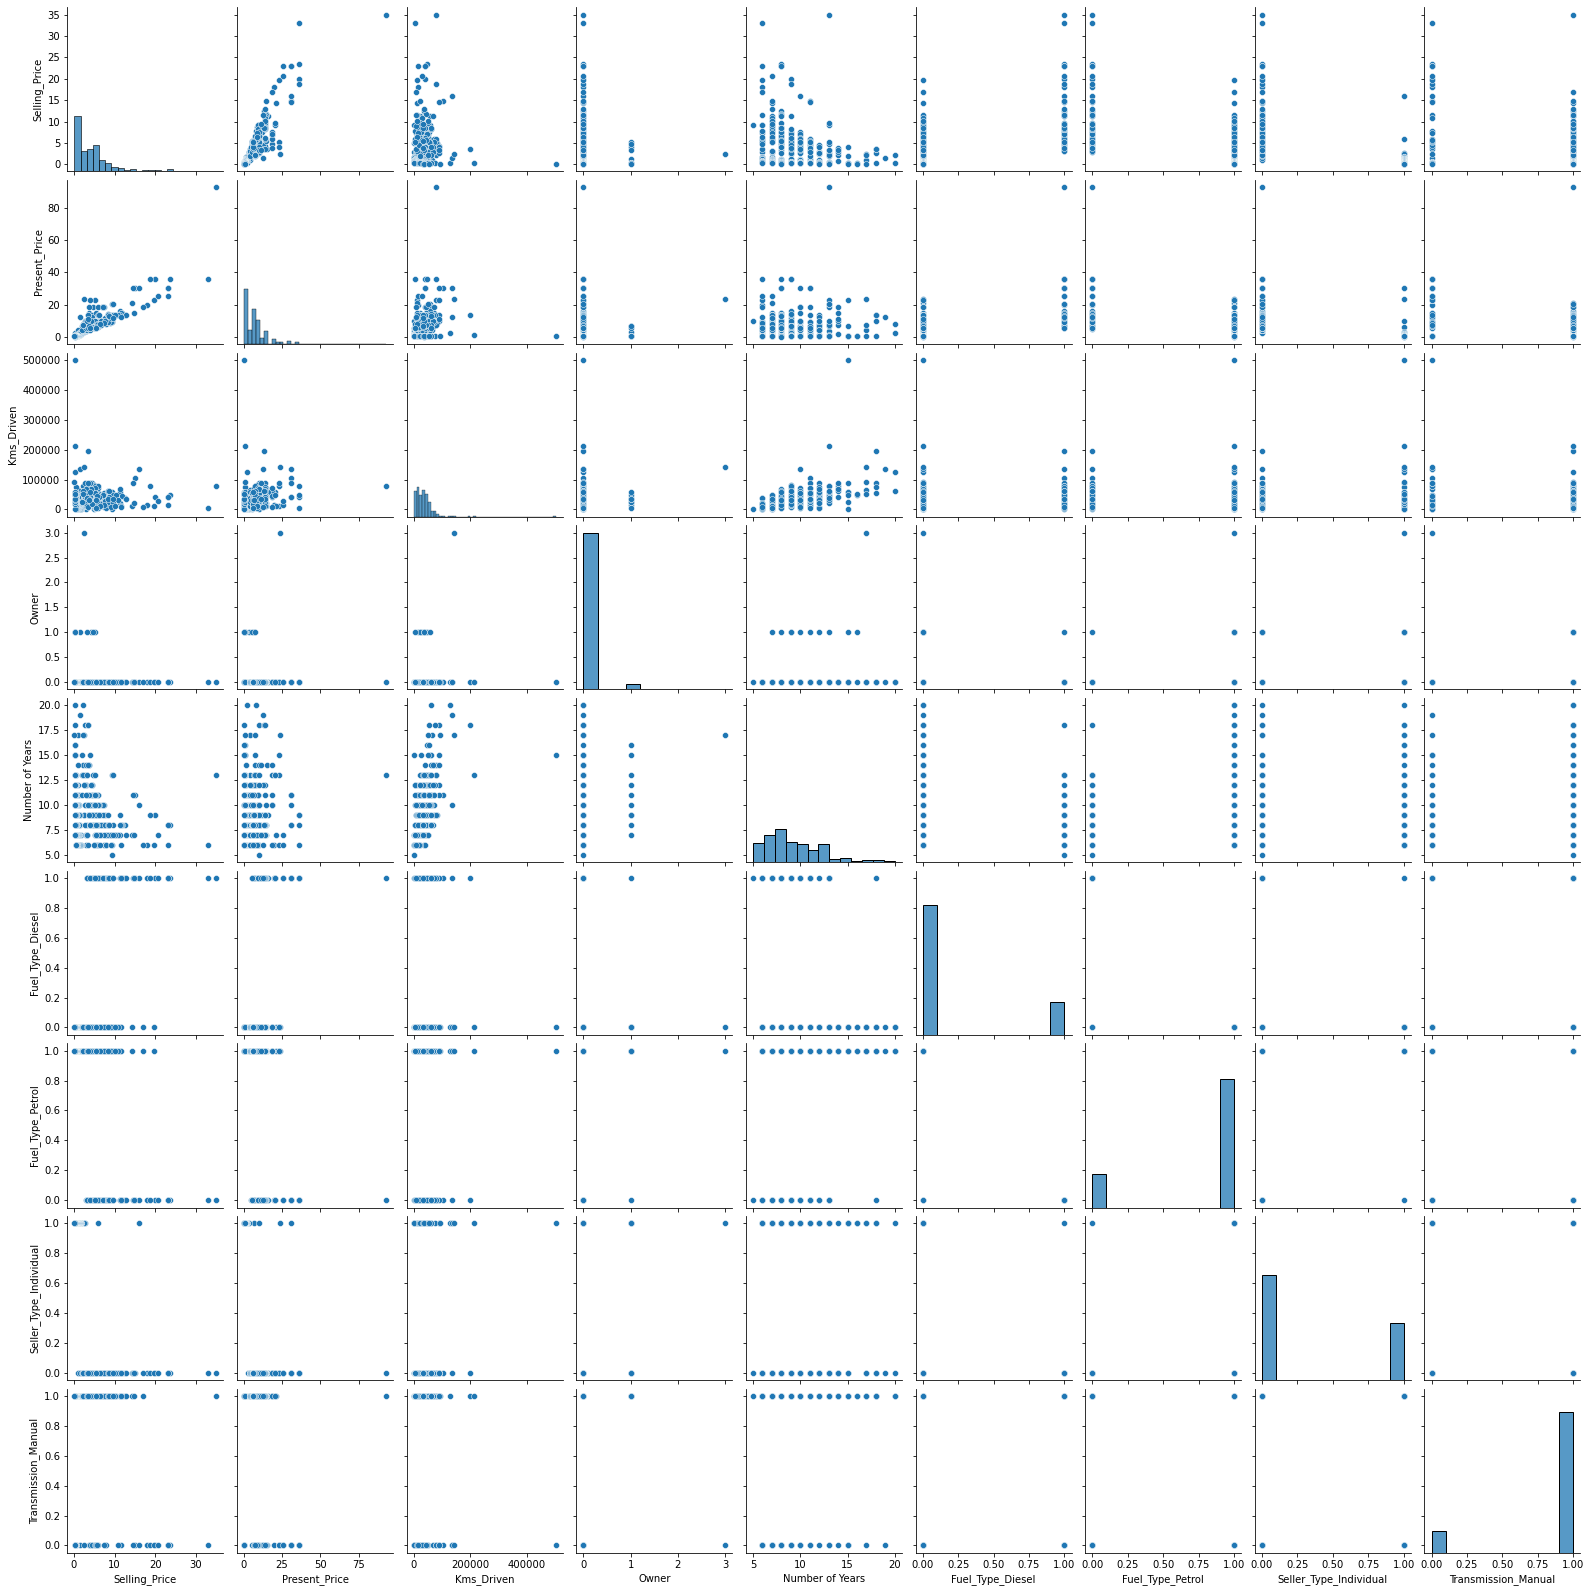

In [18]:
sns.pairplot(final_dataset)

### <span style = 'color:Green'> <i> The Heatmap </i> </span>

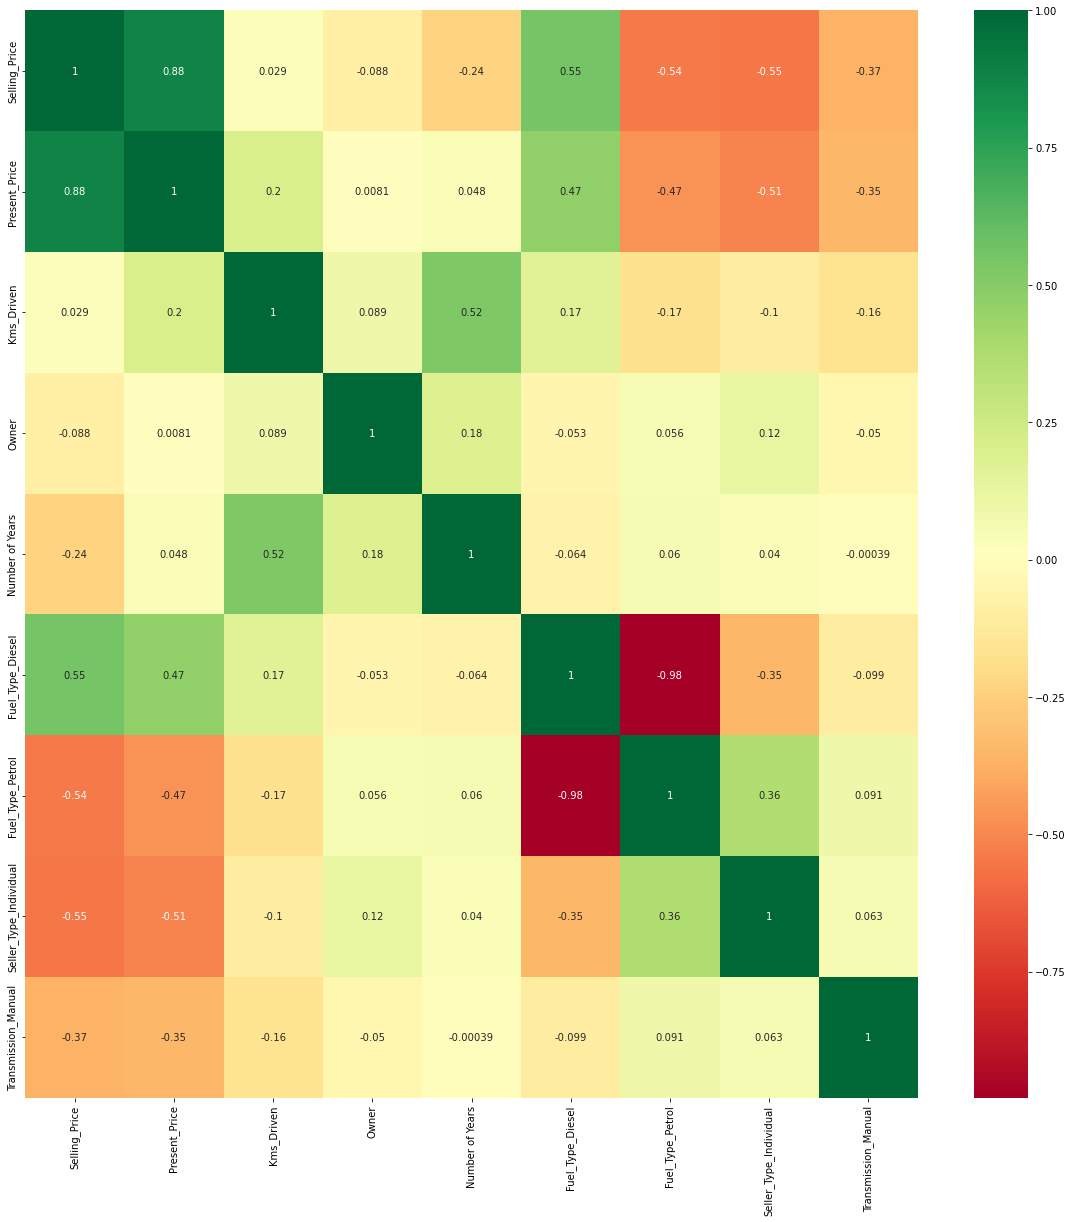

In [19]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

## Plot the Heat map
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

   * From the above heat map, <span style = 'color:Purple'> **Selling_Price** </span> and <span style = 'color:Purple'> **Present_Price** </span> are positively highly co-related to each other.
   
   * <span style = 'color:Red'> **Fuel_Type_Petrol** </span> and <span style = 'color:Red'> **Fuel_Type_Diesel** </span> are negatively co-related with each other.

## <span style = 'color:Red'> <i> Splitting the Dependent and Independent Variables </i> </span>


   * Dependent Feature: <span style = 'color:Purple'> **Selling_Price** </span>
   
   * Independent Features: 
   
       * <span style = 'color:Purple'> **Present_Price** </span>

       * <span style = 'color:Purple'> **Transmission** </span>
   
       * <span style = 'color:Purple'> **Owner** </span>
   
       * <span style = 'color:Purple'> **Fuel_Type_Diesel** </span>
   
       * <span style = 'color:Purple'> **Fuel_Type_Petrol** </span>     

#### <span style = 'color:Green'> <i> Dependent Features </i> </span>

In [20]:
X = final_dataset.iloc[:, 1:]
X.head()

,Present_Price,Kms_Driven,Owner,Number of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


#### <span style = 'color:Green'> <i> Independent Features </i> </span>

In [21]:
y = final_dataset.iloc[:, 0]
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### <span style = 'color:Red'> <i> Feature Importance </i> </span>

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

In [23]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[3.84442234e-01 3.96512339e-02 3.25010764e-04 7.81859255e-02
 2.36091751e-01 8.83711075e-03 1.20030437e-01 1.32436297e-01]


#### <span style = 'color:Green'> <i> Visualizing the Important Features </i> </span> 

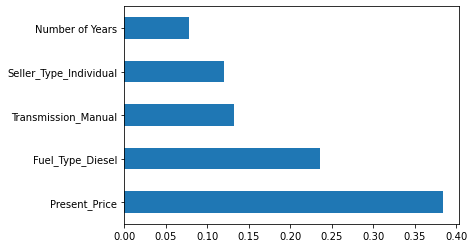

In [25]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

• The <span style = 'color:Purple'> **Present_Price** </span> is the most important feature. 

## <span style = 'color:Red'> <i> Splitting the Dataset into Training and Testing data to build a model </i> </span>

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### <span style = 'color:Green'> <i> Training Dataset </i> </span>

In [28]:
print(f"Dependent Features (Training Dataset): ")
X_train.head()

Dependent Features (Training Dataset): 


,Present_Price,Kms_Driven,Owner,Number of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
111,1.50,8700,0,7,0,1,1,1
259,7.00,36054,0,9,0,1,0,1
117,1.90,14000,0,8,0,1,1,1
24,4.41,56879,0,10,0,1,0,1
281,7.60,50456,0,17,0,1,0,1


In [29]:
print(f"Independent Features (Training Dataset): ")
y_train.head()

Independent Features (Training Dataset): 


111    1.15
259    3.90
117    1.10
24     2.90
281    2.10
Name: Selling_Price, dtype: float64

#### <span style = 'color:Green'> <i> Testing Dataset </i> </span>

In [30]:
print(f"Independent Features (Training Dataset): ")
X_test.head()

Independent Features (Training Dataset): 


,Present_Price,Kms_Driven,Owner,Number of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
71,12.480,45000,0,12,1,0,0,1
154,0.880,8000,0,9,0,1,1,1
162,0.990,14500,0,11,0,1,1,1
119,1.900,5400,0,10,0,1,1,1
150,0.826,6000,0,12,0,1,1,1


In [31]:
print(f"Independent Features (Testing Dataset): ")
y_test.head()

Independent Features (Testing Dataset): 


71     4.50
154    0.50
162    0.45
119    1.05
150    0.50
Name: Selling_Price, dtype: float64

## <span style = 'color:Red'> <i> Building a Machine Learning Model </i> </span>

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf_random = RandomForestRegressor()

### <span style = 'color:Green'> <i> Hyperparameter Tunning Using RandomizedSearchCV </i> </span>

* RandomizedSearchCV helps to find the best parameters out of this considering how many estimators, max_features and 
    depth should be there. 
    
    
* In RandomizedSearchCV all the parametres should be initialised with different values. Once all the values are 
    selected, from there RandomizedSearchCV will automatically select the best features

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [36]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

### <span style = 'color:Green'> <i> Creation of Random Gird </i> </span>

In [37]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


• **Use the random grid to search the best parameters**

           ––> First create the base model to tune

In [38]:
rf = RandomForestRegressor()

	-> Random search of parameters, using 3 fold cross validation, 
	-> search across 100 different combinations

In [39]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

### <span style = 'color:Green'> <i> Fitting the Training Dataset to the Model </i> </span>

In [40]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### <span style = 'color:Green'> <i> Prediction using the Testing Dataset

In [41]:
predictions = rf_random.predict(X_test)

In [42]:
predictions

array([ 6.67408,  0.60528,  0.52162,  1.09658,  0.54145,  1.1008 ,
       20.75536,  0.97276,  9.44384,  0.73205,  3.61588,  1.09794,
        0.52955,  8.31436,  5.23198,  6.59674,  5.57624,  0.7299 ,
       11.66988,  0.80016,  0.49356,  6.55364,  7.97942,  3.45803,
        4.97635,  0.62188,  9.37608,  1.01596,  1.01889,  6.75326,
        0.82802,  0.32865,  9.11383,  3.88762,  5.9209 ,  6.10489,
        0.80459,  3.21121,  3.8662 ,  0.58647,  6.0172 , 20.2661 ,
        3.15972,  7.14265,  9.73518,  6.54133,  0.68525,  7.21624,
        0.48391, 15.88941,  4.69548,  6.16594,  8.30068,  3.69022,
        4.92335,  0.62357,  4.05116,  1.45519, 12.14704,  5.09859,
        0.8009 ])

   • **Y_test is the real value. The difference betwen the Y_test and predictions (Predicted Values) should be minimal.**

### <span style = 'color:Green'> <i> Visualisation of the Predictions </i> </span>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

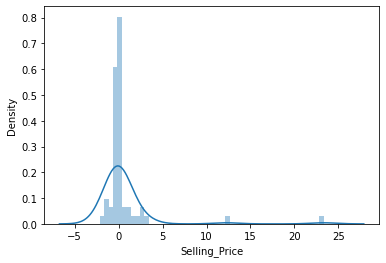

In [43]:
sns.distplot(y_test-predictions)

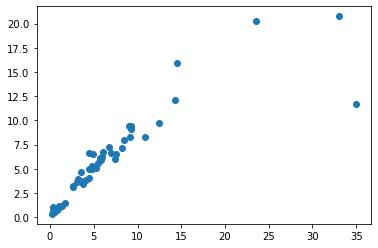

In [44]:
plt.scatter(y_test, predictions)

## <span style = 'color:Red'> <i> Creating a Pickel File </i> </span>

In [45]:
import pickle

# Open a file, where you want to store the data 
file = open('carPricePrediction.pkl', 'wb')

# Dump information to that file
pickle.dump(rf_random, file)